In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
# data = pd.read_csv('cleaned_data.csv')

# data = data.set_index('index')

# comp = pd.read_csv('cleaned_comp.csv')

# comp = comp.set_index('index')

# cols = ['매출액_b3', '매출액_b2', '매출액_b1', '영업이익_b3', '영업이익_b2',
#        '영업이익_b1', '당기순이익_b3', '당기순이익_b2', '당기순이익_b1',
#        '영업이익률_b3', '영업이익률_b2', '영업이익률_b1', '순이익률_b3', '순이익률_b2',
#        '순이익률_b1', '부채비율_b3', '부채비율_b2', '부채비율_b1',
#        '당좌비율_b3', '당좌비율_b2', '당좌비율_b1']

# merged1 = pd.merge(
#     left = data[cols],
#     right = comp[
#         ['rank_val']
#     ],
#     how='left',
#     left_index=True,
#     right_index=True
# )

# rank_dic = {
#     'A': 20,
#     'A+': 21,
#     'A-': 19,
#     'AA': 23,
#     'AA+': 24,
#     'AA-': 22,
#     'AAA': 25,
#     'B': 11,
#     'B+': 12,
#     'B-': 10,
#     'BB': 14,
#     'BB+': 15,
#     'BB-': 13,
#     'BBB': 17,
#     'BBB+': 18,
#     'BBB-': 16,
#     'C': 5,
#     'CC': 6,
#     'CCC': 8,
#     'CCC+': 9,
#     'CCC-': 7,
#     'D': 4,
#     'nan': 99,
#     '\xa0': 99,
#     '취소': 99,
# }

# comp

# data = merged1.loc[~merged1['rank_val'].isna()]

# idx = data.loc[data.isna().sum(1) > 0].index

# data = data.drop(idx)
# data

,매출액_b3,매출액_b2,매출액_b1,영업이익_b3,영업이익_b2,영업이익_b1,당기순이익_b3,당기순이익_b2,당기순이익_b1,영업이익률_b3,...,순이익률_b3,순이익률_b2,순이익률_b1,부채비율_b3,부채비율_b2,부채비율_b1,당좌비율_b3,당좌비율_b2,당좌비율_b1,rank_val
index,,,,,,,,,,,,,,,,,,,,,
0,8720.0,9819.0,12084.0,211.00,481.00,754.00,-33.00,767.00,88.00,2.42,...,-0.38,7.81,0.73,451.43,273.80,309.37,29.75,46.83,32.53,18.0
1,253.0,394.0,408.0,-109.00,-40.00,-153.00,-423.00,236.00,64.00,-42.91,...,-166.90,59.84,15.66,65.87,80.00,72.92,121.10,105.86,75.64,17.0
2,5918.0,5287.0,4866.0,463.00,643.00,905.00,250.00,572.00,822.00,7.82,...,4.22,10.81,16.90,168.76,123.83,102.86,91.30,164.07,129.68,17.0
3,1544.0,1502.0,4350.0,146.00,379.00,612.00,179.00,360.00,262.00,9.48,...,11.58,23.96,6.02,7.88,14.36,11.60,423.53,365.88,507.76,21.0
5,319991.0,344840.0,409249.0,13903.00,18818.00,21542.00,2040.00,8070.00,6868.00,4.35,...,0.64,2.34,1.68,159.97,154.84,172.03,73.36,69.78,63.95,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,-116.0,584.0,-4089.0,3.35,5.42,-11.70,-0.64,2.32,-14.20,-2.71,...,500.81,522.12,2631.81,2486.25,2853.75,360.75,-3641.00,18311.00,-128166.00,20.0
857,-874.0,-409.0,-511.0,1.54,-7.81,-0.76,-10.00,-6.36,-7.41,-24.36,...,220.45,157.12,212.41,2408.18,1606.47,1434.57,-3193.00,-1041.00,-873.00,16.0
858,826.0,35.0,-815.0,4.33,0.60,-8.12,8.98,0.32,-7.97,19.01,...,83.46,80.28,108.19,185.40,178.62,128.78,2382.00,106.00,-2336.00,19.0


In [2]:
df = pd.read_csv('dataSet03.csv')

In [5]:
df = df.iloc[:,2:-2]`

In [8]:
df.corr()

,매출액_b3,매출액_b2,매출액_b1,영업이익_b3,영업이익_b2,영업이익_b1,당기순이익_b3,당기순이익_b2,당기순이익_b1,영업이익률_b3,...,영업이익률_b1,순이익률_b3,순이익률_b2,순이익률_b1,부채비율_b3,부채비율_b2,부채비율_b1,당좌비율_b3,당좌비율_b2,당좌비율_b1
매출액_b3,1.000000,0.992249,0.964225,0.777781,0.778099,0.585123,0.620174,0.411122,0.402635,0.024755,...,0.047687,-0.094112,-0.093255,-0.048347,0.020057,0.018505,0.024818,0.005367,-0.026035,-0.007619
매출액_b2,0.992249,1.000000,0.980111,0.749071,0.800020,0.618856,0.595222,0.424541,0.446346,0.023550,...,0.055720,-0.087565,-0.087843,-0.047180,0.034933,0.033295,0.040977,-0.002186,-0.012149,-0.000354
매출액_b1,0.964225,0.980111,1.000000,0.675221,0.768183,0.656076,0.501282,0.404608,0.484688,0.021853,...,0.061484,-0.093848,-0.092520,-0.049269,0.037130,0.033600,0.043229,-0.011081,-0.026970,0.002344
영업이익_b3,0.777781,0.749071,0.675221,1.000000,0.728101,0.568934,0.894733,0.517269,0.462589,0.028892,...,0.059532,-0.079883,-0.073829,-0.040504,-0.046260,-0.045372,-0.047549,-0.022981,-0.033473,-0.022016
영업이익_b2,0.778099,0.800020,0.768183,0.728101,1.000000,0.852590,0.596488,0.603040,0.776110,0.022738,...,0.081604,-0.089201,-0.083056,-0.043428,-0.049954,-0.049975,-0.051738,-0.025729,-0.036026,-0.022893
영업이익_b1,0.585123,0.618856,0.656076,0.568934,0.852590,1.000000,0.356347,0.509611,0.958126,0.021593,...,0.107277,-0.088896,-0.081753,-0.042584,-0.048715,-0.049328,-0.051128,-0.026011,-0.035645,-0.022122
당기순이익_b3,0.620174,0.595222,0.501282,0.894733,0.596488,0.356347,1.000000,0.497090,0.304036,0.033096,...,0.049290,-0.043872,-0.040772,-0.025500,-0.029072,-0.028441,-0.030539,-0.011763,-0.020181,-0.013211
당기순이익_b2,0.411122,0.424541,0.404608,0.517269,0.603040,0.509611,0.497090,1.000000,0.456858,0.022903,...,0.068239,-0.065439,-0.034426,-0.032980,-0.038330,-0.038489,-0.039688,-0.019746,-0.027041,-0.017546
당기순이익_b1,0.402635,0.446346,0.484688,0.462589,0.776110,0.958126,0.304036,0.456858,1.000000,0.019285,...,0.113194,-0.067316,-0.060618,-0.032466,-0.036886,-0.038162,-0.039652,-0.019737,-0.026819,-0.015400
영업이익률_b3,0.024755,0.023550,0.021853,0.028892,0.022738,0.021593,0.033096,0.022903,0.019285,1.000000,...,0.024265,0.180446,-0.017391,0.001254,0.045042,0.044483,0.045487,0.099022,0.046981,0.034378


In [46]:
def get_boxplot(df,ax):
    ax = sns.boxplot(df, ax=ax, palette="Reds", 
                       medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
                     width = 0.4, notch=True,
                     boxprops = dict(linestyle='-', linewidth=2))
    return ax

In [47]:
def dist_plot(df, plots=1):
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    ax[0] = get_boxplot(df, ax[0])
    ax[1] = sns.distplot(df, ax=ax[1], kde_kws={"color": "y"},  hist_kws={"histtype": "step", "color": "k"})
    ax[1].axvline(x = df.mean(), color = 'r', linewidth=1.5, linestyle='--', label='mean')
    ax[1].axvline(x = df.median(), color = 'g', linewidth=1.5, linestyle='--', label='median')
    ax[1].set(xlabel = df.name, ylabel='frequency', title='Histogram of ' + df.name)
    plt.legend()
    plt.tight_layout()

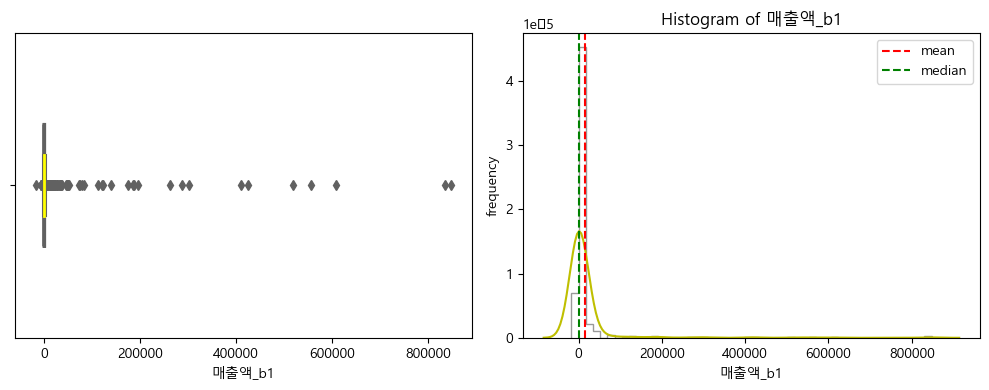

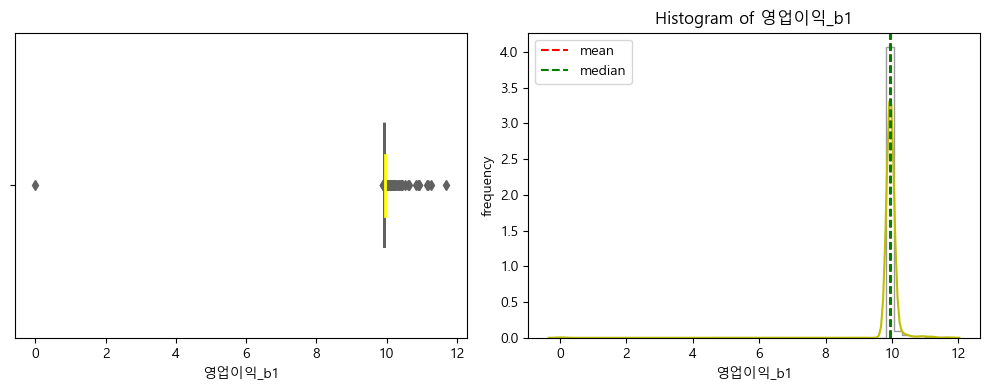

In [5]:
dist_plot(data['매출액_b1'])

dist_plot(np.log1p(merged1['영업이익_b1'] - merged1['영업이익_b1'].min()))

In [6]:
data.loc[data['영업이익_b1'] == 0]

,매출액_b3,매출액_b2,매출액_b1,영업이익_b3,영업이익_b2,영업이익_b1,당기순이익_b3,당기순이익_b2,당기순이익_b1,영업이익률_b3,...,순이익률_b3,순이익률_b2,순이익률_b1,부채비율_b3,부채비율_b2,부채비율_b1,당좌비율_b3,당좌비율_b2,당좌비율_b1,rank_val
index,,,,,,,,,,,,,,,,,,,,,


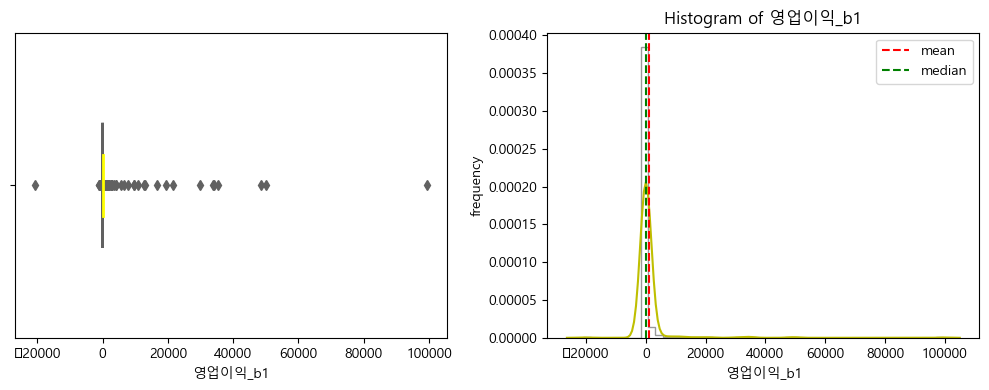

In [7]:
dist_plot(data['영업이익_b1'])

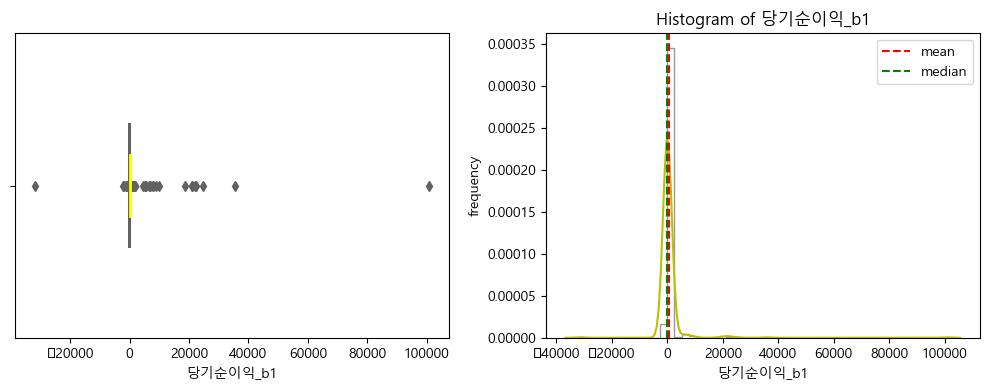

In [8]:
dist_plot(data['당기순이익_b1'])

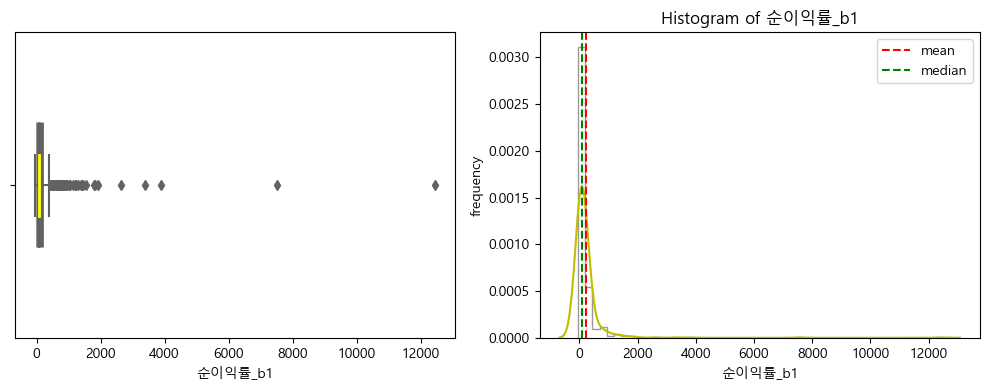

In [9]:
dist_plot(data['순이익률_b1'])

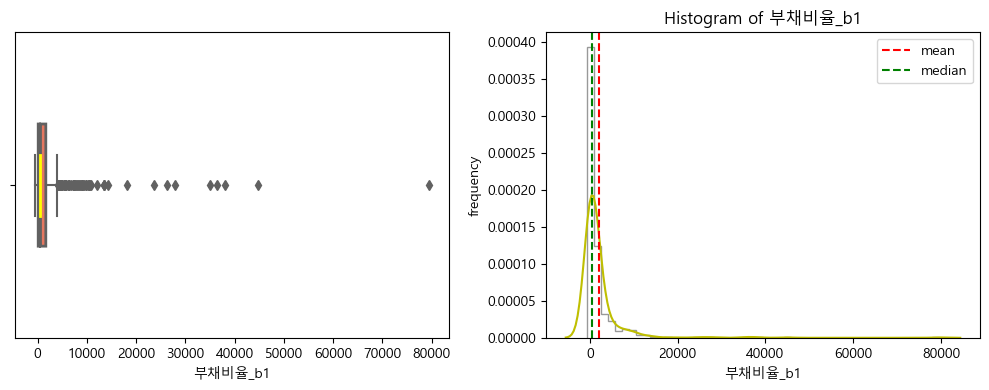

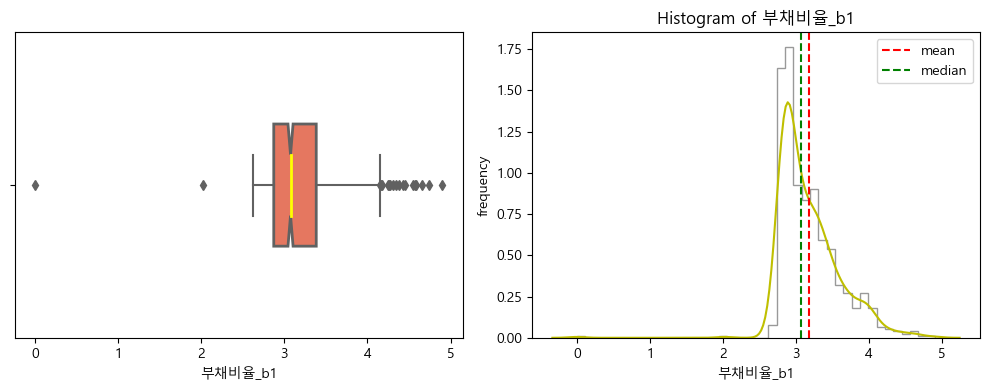

In [10]:
dist_plot(data['부채비율_b1'])

dist_plot(np.log10(merged1['부채비율_b1'] - merged1['부채비율_b1'].min() + 1))

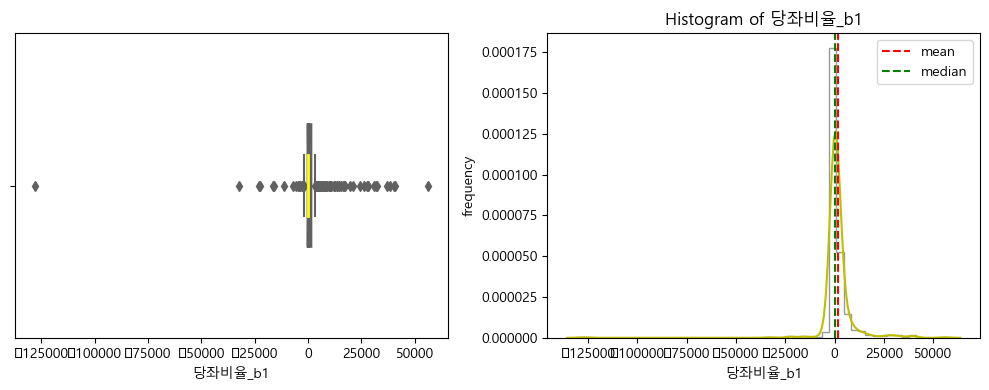

In [11]:
dist_plot(data['당좌비율_b1'])

In [12]:
data = data.reset_index()
data = data.dropna()

In [83]:
df = pd.read_csv('dataSet01.csv')

In [86]:
df = df.drop(columns=['Unnamed: 0'])

In [87]:
data = df

In [137]:
data

,index,매출액_b3,매출액_b2,매출액_b1,영업이익_b3,영업이익_b2,영업이익_b1,당기순이익_b3,당기순이익_b2,당기순이익_b1,...,순이익률_b2,순이익률_b1,부채비율_b3,부채비율_b2,부채비율_b1,당좌비율_b3,당좌비율_b2,당좌비율_b1,rank_val,target
0,0,8720.0,9819.0,12084.0,211.00,481.00,754.00,-33.00,767.00,88.00,...,7.81,0.73,451.43,273.80,309.37,29.75,46.83,32.53,18.0,1
1,1,253.0,394.0,408.0,-109.00,-40.00,-153.00,-423.00,236.00,64.00,...,59.84,15.66,65.87,80.00,72.92,121.10,105.86,75.64,17.0,1
2,2,5918.0,5287.0,4866.0,463.00,643.00,905.00,250.00,572.00,822.00,...,10.81,16.90,168.76,123.83,102.86,91.30,164.07,129.68,17.0,1
3,3,1544.0,1502.0,4350.0,146.00,379.00,612.00,179.00,360.00,262.00,...,23.96,6.02,7.88,14.36,11.60,423.53,365.88,507.76,21.0,1
4,5,319991.0,344840.0,409249.0,13903.00,18818.00,21542.00,2040.00,8070.00,6868.00,...,2.34,1.68,159.97,154.84,172.03,73.36,69.78,63.95,22.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,853,-116.0,584.0,-4089.0,3.35,5.42,-11.70,-0.64,2.32,-14.20,...,522.12,2631.81,2486.25,2853.75,360.75,-3641.00,18311.00,-128166.00,20.0,1
515,857,-874.0,-409.0,-511.0,1.54,-7.81,-0.76,-10.00,-6.36,-7.41,...,157.12,212.41,2408.18,1606.47,1434.57,-3193.00,-1041.00,-873.00,16.0,1
516,858,826.0,35.0,-815.0,4.33,0.60,-8.12,8.98,0.32,-7.97,...,80.28,108.19,185.40,178.62,128.78,2382.00,106.00,-2336.00,19.0,1
517,859,227.0,620.0,1475.0,0.58,1.71,4.11,0.51,1.37,3.26,...,1892.66,1839.61,122.14,111.97,121.00,349.00,952.00,2264.00,20.0,1


In [138]:
data.columns

Index(['index', '매출액_b3', '매출액_b2', '매출액_b1', '영업이익_b3', '영업이익_b2', '영업이익_b1',
       '당기순이익_b3', '당기순이익_b2', '당기순이익_b1', '영업이익률_b3', '영업이익률_b2', '영업이익률_b1',
       '순이익률_b3', '순이익률_b2', '순이익률_b1', '부채비율_b3', '부채비율_b2', '부채비율_b1',
       '당좌비율_b3', '당좌비율_b2', '당좌비율_b1', 'rank_val', 'target'],
      dtype='object')

In [139]:
pd.set_option('display.max_rows', 1000)

In [140]:
data.columns[[6,9,12,15,18,21,22]]

Index(['영업이익_b1', '당기순이익_b1', '영업이익률_b1', '순이익률_b1', '부채비율_b1', '당좌비율_b1',
       'rank_val'],
      dtype='object')

In [141]:
data[data.columns[[6,9,12,15,18,21,22]]]

,영업이익_b1,당기순이익_b1,영업이익률_b1,순이익률_b1,부채비율_b1,당좌비율_b1,rank_val
0,754.00,88.00,6.24,0.73,309.37,32.53,18.0
1,-153.00,64.00,-37.41,15.66,72.92,75.64,17.0
2,905.00,822.00,18.59,16.90,102.86,129.68,17.0
3,612.00,262.00,14.07,6.02,11.60,507.76,21.0
4,21542.00,6868.00,5.26,1.68,172.03,63.95,22.0
5,-768.00,-2145.00,-5.99,-16.74,816.20,53.12,19.0
6,1374.00,-1768.00,2.87,-3.69,137.83,70.53,22.0
7,4118.00,1968.00,3.40,1.62,140.27,84.53,22.0
8,41.00,74.00,2.71,4.86,89.47,14.69,19.0
9,16647.00,8027.00,5.53,2.67,160.33,61.80,23.0


In [142]:
x_temp = data['index']
y_temp = data['index']

In [143]:
train, test, _, _ = train_test_split(x_temp, y_temp, test_size=0.2, shuffle=True)

train_idx = train.index
test_idx = test.index

<AxesSubplot:xlabel='rank_val', ylabel='Probability'>

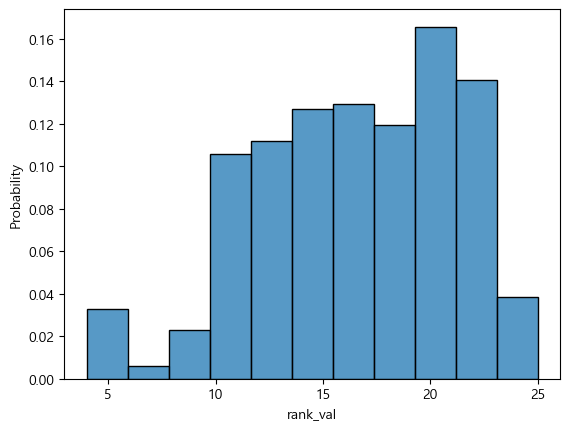

In [131]:
sns.histplot(data['rank_val'], stat='probability', )

In [132]:
# 첫번쨰
# 6,9,12,15,18,21
en = data.columns[[6,9,12,15,18,21]]
ex = data.columns[[22]]

In [144]:
train, test, _, _ = train_test_split(data[en], data[ex], test_size=0.2, shuffle=True)

train_idx = train.index
test_idx = test.index

                 Generalized Linear Model Regression Results                  
Dep. Variable:               rank_val   No. Observations:                  415
Model:                            GLM   Df Residuals:                      408
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -216.24
Date:                Mon, 05 Jun 2023   Deviance:                       432.48
Time:                        20:06:37   Pearson chi2:                     412.
No. Iterations:                    12   Pseudo R-squ. (CS):             0.2700
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7061      0.159     -4.442      0.0

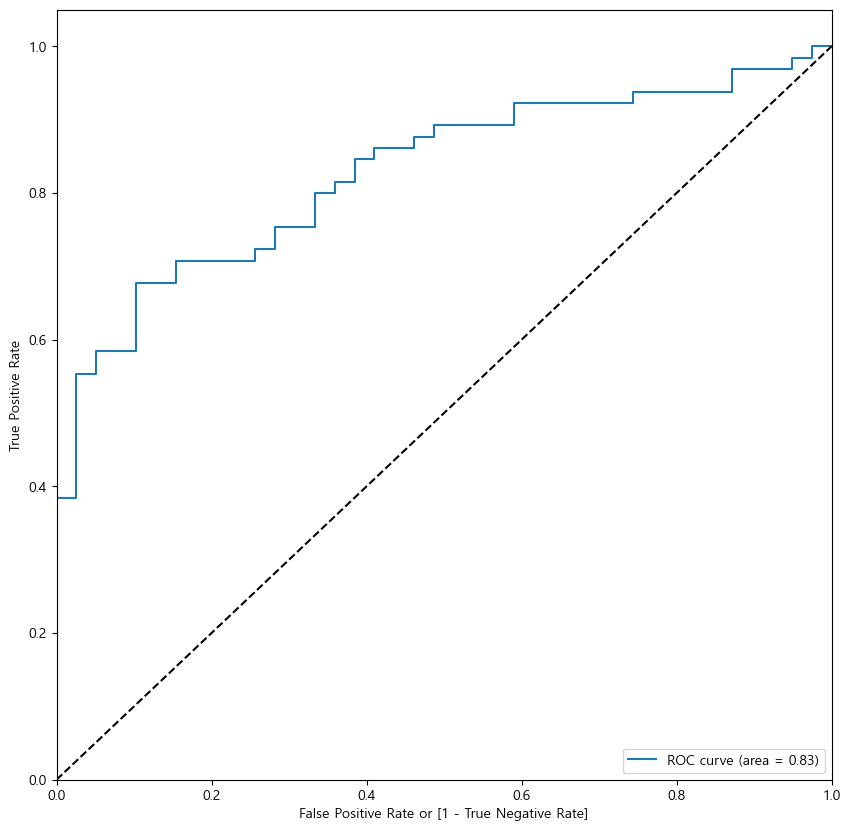

In [145]:
x = data.loc[train_idx,en]
x_test = data.loc[test_idx,en]
y = data.loc[train_idx, ex]
y = (y > 15) * 1
y_test = data.loc[test_idx, ex]
y_test = (y_test > 15) * 1

model = sm.GLM(endog = y, exog = sm.add_constant(x), family = sm.families.Binomial() )

fit = model.fit()

print(fit.summary())
print('AIC : {0:.4f}'.format(fit.aic))

pred = (fit.predict(sm.add_constant(x_test)) > 0.5) * 1
print('test err rate : {}'.format(np.mean(y_test['rank_val'].values != pred)))

target = y_test
model_diag(fit, x_test)

In [154]:
# 두번쨰
en = data.columns[[5,6,8,9,11,12,14,15,17,18,20,21]]
ex = data.columns[[22]]

In [155]:
x = data.loc[train_idx,en]
x_test = data.loc[test_idx,en]
y = data.loc[train_idx, ex]
y = (y > 15) * 1
y_test = data.loc[test_idx, ex]
y_test = (y_test > 15) * 1

model = sm.GLM(endog = y, exog = sm.add_constant(x), family = sm.families.Binomial() )

fit = model.fit()

print(fit.summary())
print('AIC : {0:.4f}'.format(fit.aic))

pred = (fit.predict(sm.add_constant(x_test)) > 0.5) * 1
print('test err rate : {}'.format(np.mean(y_test['rank_val'].values != pred)))

target = y_test
model_diag(fit, x_test)

PerfectSeparationError: Perfect separation detected, results not available

In [148]:
# 세번째
data.iloc[:,1:-1] = np.log10(data.iloc[:,1:-1] - data.iloc[:,1:-1].min() + 1)

In [151]:
en = data.columns[[6,9,12,15,18,21]]
ex = data.columns[[22]]

In [152]:
x = data.loc[train_idx,en]
x_test = data.loc[test_idx,en]
y = data.loc[train_idx, ex]
y = (y > 19) * 1
y_test = data.loc[test_idx, ex]
y_test = (y_test > 19) * 1

model = sm.GLM(endog = y, exog = sm.add_constant(x), family = sm.families.Binomial() )

fit = model.fit()

print(fit.summary())
print('AIC : {0:.4f}'.format(fit.aic))

pred = (fit.predict(sm.add_constant(x_test)) > 0.5) * 1
print('test err rate : {}'.format(np.mean(y_test['rank_val'].values != pred)))

target = y_test
model_diag(fit, x_test)

PerfectSeparationError: Perfect separation detected, results not available

In [34]:
# 네번째
en = data.columns[[5,6,8,9,11,12,14,15,17,18,20,21]]
ex = data.columns[[22]]

In [35]:
x = data.loc[train_idx,en]
x_test = data.loc[test_idx,en]
y = data.loc[train_idx, ex]
y = (y > 19) * 1
y_test = data.loc[test_idx, ex]
y_test = (y_test > 19) * 1

model = sm.GLM(endog = y, exog = sm.add_constant(x), family = sm.families.Binomial() )

fit = model.fit()

print(fit.summary())
print('AIC : {0:.4f}'.format(fit.aic))

pred = (fit.predict(sm.add_constant(x_test)) > 0.5) * 1
print('test err rate : {}'.format(np.mean(y_test['rank_val'].values != pred)))

target = y_test
model_diag(fit, x_test)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               rank_val   No. Observations:                  415
Model:                            GLM   Df Residuals:                      402
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -173.03
Date:                Mon, 05 Jun 2023   Deviance:                       346.05
Time:                        18:31:33   Pearson chi2:                     446.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.3708
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1329      0.212    -10.080      0.0

NameError: name 'model_diag' is not defined

In [36]:
x

,영업이익_b2,영업이익_b1,당기순이익_b2,당기순이익_b1,영업이익률_b2,영업이익률_b1,순이익률_b2,순이익률_b1,부채비율_b2,부채비율_b1,당좌비율_b2,당좌비율_b1
488,1.68,2.90,1.19,2.59,6.13,27.68,1289.78,7523.55,150.15,-65.38,1045.00,1992.00
87,4.77,1.43,3.89,0.69,6.77,1.52,929.84,908.03,175.53,186.13,84.00,20.00
29,2734.00,1164.00,1763.00,502.00,8.13,3.53,5.24,1.52,127.58,152.81,143.88,111.68
256,5.13,2.91,2.23,2.31,2.59,6.14,93.44,97.03,9701.53,10270.62,12315.00,30831.00
475,4.44,4.09,5.71,10.48,4.22,8.83,19.01,21.09,1138.77,1247.42,514.00,1144.00
...,...,...,...,...,...,...,...,...,...,...,...,...
237,10.18,9.94,8.82,8.83,15.38,18.92,90.32,103.39,931.12,1116.95,7480.00,10593.00
218,-5.00,-2.80,-6.29,-3.52,-47.16,-35.10,934.45,910.02,-108.62,-115.76,-205.00,-119.00
367,5.06,3.32,0.46,0.89,4.61,2.09,148.69,160.96,1577.95,1755.11,366.00,175.00
201,2.03,4.76,0.73,0.74,5.49,4.52,287.03,247.60,326.31,361.25,143.00,113.00


In [49]:
def draw_roc_curve(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 10))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

In [50]:
def model_diag(fit, X):
    prob = fit.predict(sm.add_constant(X))

    treshold = 0.5

    pred = (prob > treshold) + 0

    final_cm = metrics.confusion_matrix(target, pred)
    print('Confusion matric \n', final_cm)

    print('Accuracy of the model : ', metrics.accuracy_score(target, pred).round(4))
    print('Recall : ', metrics.recall_score(target, pred).round(4))

    tn = final_cm[0,0]
    fn = final_cm[1,0]
    fp = final_cm[0,1]
    tp = final_cm[1,1]

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    false_positive_rate = 1 - specificity
    positive_predictive_rate = tp / (tp + fp)
    negative_predictive_rate = tn / (tn + fn)

    print('treshold : ', treshold)
    print('sensitivity : ', sensitivity.round(3))
    print('specificity : ', specificity.round(3))
    print('false_positive_rate : ', false_positive_rate.round(3))
    print('positive_predictive_rate : ', positive_predictive_rate.round(3))
    print('negative_predictive_rate : ', negative_predictive_rate.round(3))

    draw_roc_curve(target, prob)

Confusion matric 
 [[64  7]
 [16 17]]
Accuracy of the model :  0.7788
Recall :  0.5152
treshold :  0.5
sensitivity :  0.515
specificity :  0.901
false_positive_rate :  0.099
positive_predictive_rate :  0.708
negative_predictive_rate :  0.8


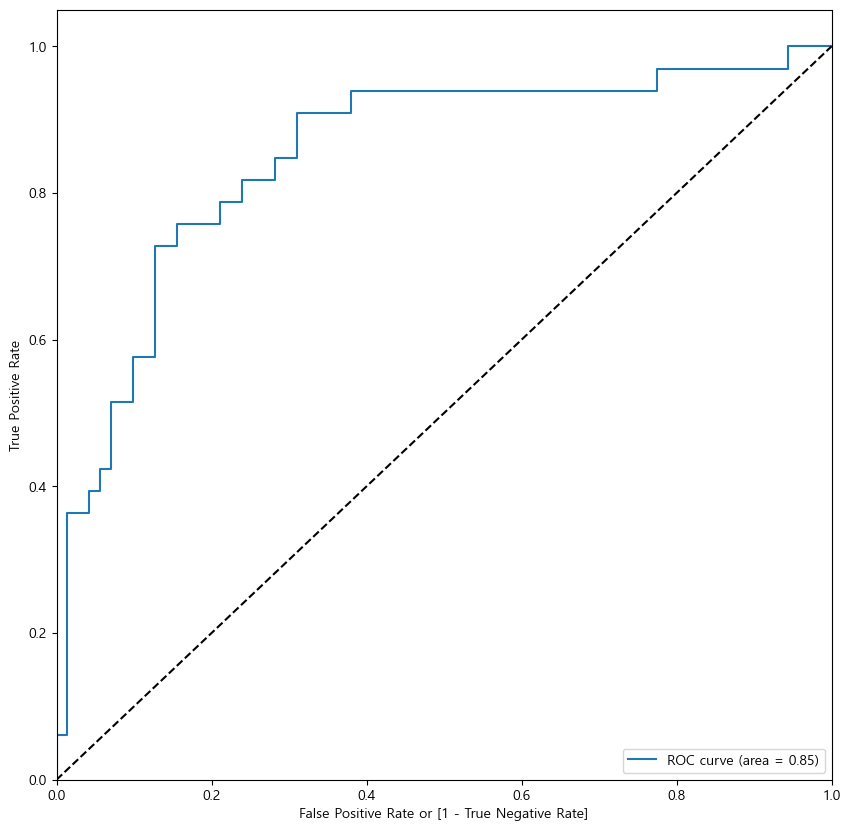

In [39]:
target = y_test
model_diag(fit, x_test)

In [40]:
y_test

,rank_val
323,0
378,0
173,1
376,0
99,0
...,...
258,0
389,0
371,0
76,1


In [41]:
data_.columns[[6,9,12,15,18,21]]

Index(['영업이익_b1', '당기순이익_b1', '영업이익률_b1', '순이익률_b1', '부채비율_b1', '당좌비율_b1'], dtype='object')

In [42]:
temp = data_.iloc[:,[6,9,12,15,18,21]]

In [43]:
temp['부채비율_b1 * 당좌비율_b1'] = data['부채비율_b1'] * data['당좌비율_b1']

temp['target'] = data['rank_val']

temp

,영업이익_b1,당기순이익_b1,영업이익률_b1,순이익률_b1,부채비율_b1,당좌비율_b1,부채비율_b1 * 당좌비율_b1,target
0,754.00,88.00,6.24,0.73,309.37,32.53,1.006381e+04,18.0
1,-153.00,64.00,-37.41,15.66,72.92,75.64,5.515669e+03,17.0
2,905.00,822.00,18.59,16.90,102.86,129.68,1.333888e+04,17.0
3,612.00,262.00,14.07,6.02,11.60,507.76,5.890016e+03,21.0
4,21542.00,6868.00,5.26,1.68,172.03,63.95,1.100132e+04,22.0
...,...,...,...,...,...,...,...,...
514,-11.70,-14.20,-135.41,2631.81,360.75,-128166.00,-4.623588e+07,20.0
515,-0.76,-7.41,-12.85,212.41,1434.57,-873.00,-1.252380e+06,16.0
516,-8.12,-7.97,-19.00,108.19,128.78,-2336.00,-3.008301e+05,19.0
517,4.11,3.26,20.91,1839.61,121.00,2264.00,2.739440e+05,20.0


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  519
Model:                            GLM   Df Residuals:                      511
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -271.01
Date:                Mon, 05 Jun 2023   Deviance:                       542.02
Time:                        18:31:36   Pearson chi2:                 2.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2166
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.5578      0.15

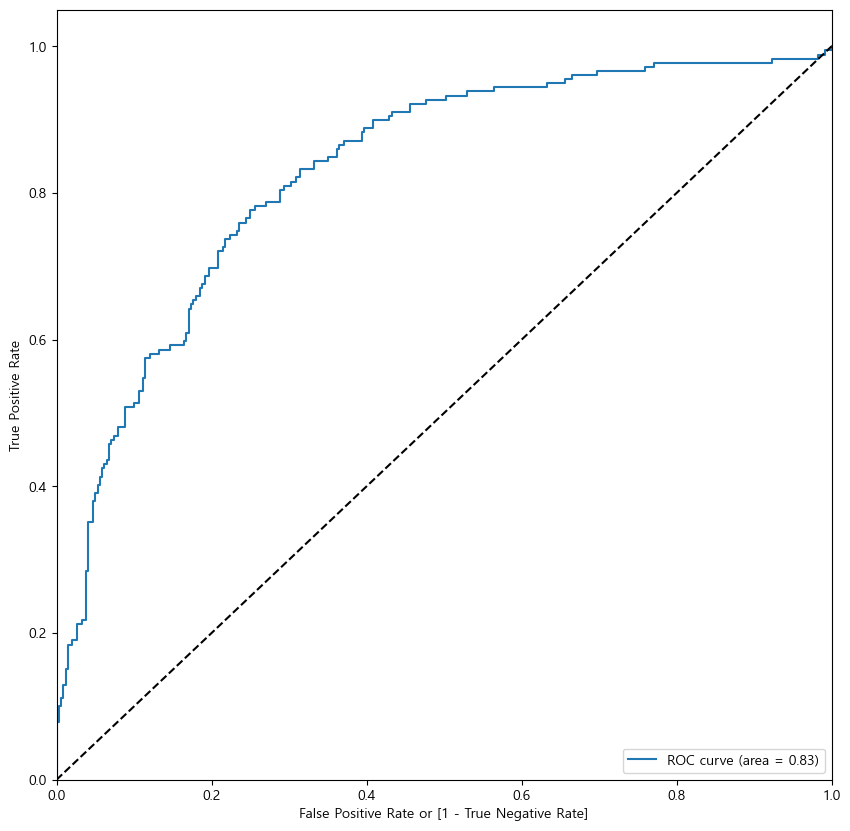

In [44]:
X = temp.iloc[:,:-1]

target = (temp['target'] > 19) * 1

model = sm.GLM(endog = target, exog = sm.add_constant(X), family = sm.families.Binomial() )

fit = model.fit()

print(fit.summary())
print('AIC : {0:.4f}'.format(fit.aic))

pred = (fit.predict(sm.add_constant(X)) > 0.5) * 1
print('test err rate : {}'.format(target != pred))

model_diag(fit, X)

In [45]:
temp = data_.iloc[:,[6,9,12,15,18,21]]

In [46]:
# 5월 20일

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 30)

In [93]:
df=pd.read_csv('dataSet03.csv')

In [94]:
data = df

In [95]:
data.columns

Index(['Unnamed: 0', 'index', '매출액_b3', '매출액_b2', '매출액_b1', '영업이익_b3',
       '영업이익_b2', '영업이익_b1', '당기순이익_b3', '당기순이익_b2', '당기순이익_b1', '영업이익률_b3',
       '영업이익률_b2', '영업이익률_b1', '순이익률_b3', '순이익률_b2', '순이익률_b1', '부채비율_b3',
       '부채비율_b2', '부채비율_b1', '당좌비율_b3', '당좌비율_b2', '당좌비율_b1', 'rank_val',
       'target'],
      dtype='object')

In [97]:
df = data[[
    'index', '매출액_b3', '매출액_b2', '매출액_b1', '영업이익_b3',
       '영업이익_b2', '영업이익_b1', '당기순이익_b3', '당기순이익_b2', '당기순이익_b1', '영업이익률_b3',
       '영업이익률_b2', '영업이익률_b1', '순이익률_b3', '순이익률_b2', '순이익률_b1', '부채비율_b3',
       '부채비율_b2', '부채비율_b1', '당좌비율_b3', '당좌비율_b2', '당좌비율_b1', 'rank_val'
]]

In [100]:
df = df.set_index('index')

In [101]:
df.columns

Index(['매출액_b3', '매출액_b2', '매출액_b1', '영업이익_b3', '영업이익_b2', '영업이익_b1',
       '당기순이익_b3', '당기순이익_b2', '당기순이익_b1', '영업이익률_b3', '영업이익률_b2', '영업이익률_b1',
       '순이익률_b3', '순이익률_b2', '순이익률_b1', '부채비율_b3', '부채비율_b2', '부채비율_b1',
       '당좌비율_b3', '당좌비율_b2', '당좌비율_b1', 'rank_val'],
      dtype='object')

In [103]:
temp = df.iloc[:,:-1]

In [106]:
temp.columns

Index(['매출액_b3', '매출액_b2', '매출액_b1', '영업이익_b3', '영업이익_b2', '영업이익_b1',
       '당기순이익_b3', '당기순이익_b2', '당기순이익_b1', '영업이익률_b3', '영업이익률_b2', '영업이익률_b1',
       '순이익률_b3', '순이익률_b2', '순이익률_b1', '부채비율_b3', '부채비율_b2', '부채비율_b1',
       '당좌비율_b3', '당좌비율_b2', '당좌비율_b1'],
      dtype='object')

In [104]:
scaler = StandardScaler()

scaler.fit(temp)

scaled_X = scaler.transform(temp)

In [105]:
scaled_X = pd.DataFrame(scaled_X)

In [107]:
scaled_X.columns = temp.columns

In [108]:
temp = scaled_X
temp

,매출액_b3,매출액_b2,매출액_b1,영업이익_b3,영업이익_b2,영업이익_b1,당기순이익_b3,당기순이익_b2,당기순이익_b1,영업이익률_b3,...,영업이익률_b1,순이익률_b3,순이익률_b2,순이익률_b1,부채비율_b3,부채비율_b2,부채비율_b1,당좌비율_b3,당좌비율_b2,당좌비율_b1
0,-0.014066,-0.045401,-0.041744,-0.061553,-0.074429,-0.029644,-0.107247,-0.024041,-0.097066,0.087398,...,0.209616,-0.618469,-0.602899,-0.304511,-0.280673,-0.308778,-0.311061,-0.190740,-0.254028,-0.173787
1,-0.189707,-0.195570,-0.193058,-0.179525,-0.155668,-0.171554,-0.336254,-0.085766,-0.101433,-0.370819,...,-1.412930,-1.211834,-0.414565,-0.283791,-0.359853,-0.343535,-0.352917,-0.173067,-0.248349,-0.168853
2,-0.072191,-0.117610,-0.135285,0.031350,-0.049169,-0.006018,0.058930,-0.046708,0.036496,0.141984,...,0.668687,-0.602078,-0.592040,-0.282070,-0.338723,-0.335674,-0.347617,-0.178832,-0.242749,-0.162668
3,-0.162926,-0.177916,-0.141972,-0.085516,-0.090334,-0.051861,0.017239,-0.071352,-0.065404,0.158764,...,0.500671,-0.575852,-0.544441,-0.297170,-0.371763,-0.355307,-0.363772,-0.114557,-0.223336,-0.119395
4,6.442995,5.292476,5.105276,4.986164,2.784829,3.222878,1.110016,0.824887,1.136649,0.106908,...,0.173188,-0.614835,-0.622699,-0.303193,-0.340529,-0.330113,-0.335373,-0.182303,-0.251820,-0.170191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,-0.197362,-0.192542,-0.251337,-0.138106,-0.148585,-0.149446,-0.088245,-0.112930,-0.115662,0.035542,...,-5.055759,1.167433,1.258759,3.347003,0.137208,0.153926,-0.301966,-0.900901,1.502946,-14.846577
515,-0.213086,-0.208364,-0.204968,-0.138773,-0.150648,-0.147735,-0.093741,-0.113939,-0.114427,-0.183307,...,-0.499992,0.168419,-0.062439,-0.010734,0.121175,-0.069769,-0.111881,-0.814229,-0.358674,-0.277428
516,-0.177821,-0.201289,-0.208907,-0.137745,-0.149337,-0.148886,-0.082596,-0.113162,-0.114529,0.255098,...,-0.728598,-0.319720,-0.340578,-0.155374,-0.335306,-0.325848,-0.343029,0.264338,-0.248336,-0.444874
517,-0.190247,-0.191969,-0.179230,-0.139127,-0.149164,-0.146973,-0.087570,-0.113040,-0.112485,0.094879,...,0.754926,5.530794,6.219730,2.247557,-0.348298,-0.337801,-0.344406,-0.128976,-0.166952,0.081613


In [109]:
temp['매출액_증분'] =  (data['매출액_b1'] - data['매출액_b2'])
temp['영업이익_증분'] =  (data['영업이익_b1'] - data['영업이익_b2'])
temp['당기순이익_증분'] =  (data['당기순이익_b1'] - data['당기순이익_b2'])
temp['영업이익률_증분'] =  (data['영업이익률_b1'] - data['영업이익률_b2'])
temp['순이익률_증분'] =  (data['순이익률_b1'] - data['순이익률_b2'])
temp['부채비율_증분'] =  (data['부채비율_b1'] - data['부채비율_b2'])
temp['당좌비율_증분'] =  (data['당좌비율_b1'] - data['당좌비율_b2'])

In [110]:
temp

,매출액_b3,매출액_b2,매출액_b1,영업이익_b3,영업이익_b2,영업이익_b1,당기순이익_b3,당기순이익_b2,당기순이익_b1,영업이익률_b3,...,당좌비율_b3,당좌비율_b2,당좌비율_b1,매출액_증분,영업이익_증분,당기순이익_증분,영업이익률_증분,순이익률_증분,부채비율_증분,당좌비율_증분
0,-0.014066,-0.045401,-0.041744,-0.061553,-0.074429,-0.029644,-0.107247,-0.024041,-0.097066,0.087398,...,-0.190740,-0.254028,-0.173787,2265.0,273.00,-679.00,1.34,-7.08,35.57,-14.30
1,-0.189707,-0.195570,-0.193058,-0.179525,-0.155668,-0.171554,-0.336254,-0.085766,-0.101433,-0.370819,...,-0.173067,-0.248349,-0.168853,14.0,-113.00,-172.00,-27.35,-44.18,-7.08,-30.22
2,-0.072191,-0.117610,-0.135285,0.031350,-0.049169,-0.006018,0.058930,-0.046708,0.036496,0.141984,...,-0.178832,-0.242749,-0.162668,-421.0,262.00,250.00,6.43,6.09,-20.97,-34.39
3,-0.162926,-0.177916,-0.141972,-0.085516,-0.090334,-0.051861,0.017239,-0.071352,-0.065404,0.158764,...,-0.114557,-0.223336,-0.119395,2848.0,233.00,-98.00,-11.17,-17.94,-2.76,141.88
4,6.442995,5.292476,5.105276,4.986164,2.784829,3.222878,1.110016,0.824887,1.136649,0.106908,...,-0.182303,-0.251820,-0.170191,64409.0,2724.00,-1202.00,-0.20,-0.66,17.19,-5.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,-0.197362,-0.192542,-0.251337,-0.138106,-0.148585,-0.149446,-0.088245,-0.112930,-0.115662,0.035542,...,-0.900901,1.502946,-14.846577,-4673.0,-17.12,-16.52,-148.51,2109.69,-2493.00,-146477.00
515,-0.213086,-0.208364,-0.204968,-0.138773,-0.150648,-0.147735,-0.093741,-0.113939,-0.114427,-0.183307,...,-0.814229,-0.358674,-0.277428,-102.0,7.05,-1.05,-0.75,55.29,-171.90,168.00
516,-0.177821,-0.201289,-0.208907,-0.137745,-0.149337,-0.148886,-0.082596,-0.113162,-0.114529,0.255098,...,0.264338,-0.248336,-0.444874,-850.0,-8.72,-8.29,-19.78,27.91,-49.84,-2442.00
517,-0.190247,-0.191969,-0.179230,-0.139127,-0.149164,-0.146973,-0.087570,-0.113040,-0.112485,0.094879,...,-0.128976,-0.166952,0.081613,855.0,2.40,1.89,12.14,-53.05,9.03,1312.00


In [111]:
scaler = StandardScaler()

scaler.fit(temp)

scaled_X = scaler.transform(temp)

In [112]:
scaled_X = pd.DataFrame(scaled_X)
scaled_X

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.014066,-0.045401,-0.041744,-0.061553,-0.074429,-0.029644,-0.107247,-0.024041,-0.097066,0.087398,...,-0.190740,-0.254028,-0.173787,-0.018580,0.082807,-0.041816,0.010317,-0.085279,-0.039962,0.099662
1,-0.189707,-0.195570,-0.193058,-0.179525,-0.155668,-0.171554,-0.336254,-0.085766,-0.101433,-0.370819,...,-0.173067,-0.248349,-0.168853,-0.131125,-0.028230,0.023093,-0.600615,-0.145139,-0.087914,0.098248
2,-0.072191,-0.117610,-0.135285,0.031350,-0.049169,-0.006018,0.058930,-0.046708,0.036496,0.141984,...,-0.178832,-0.242749,-0.162668,-0.152874,0.079643,0.077121,0.118705,-0.064030,-0.103530,0.097878
3,-0.162926,-0.177916,-0.141972,-0.085516,-0.090334,-0.051861,0.017239,-0.071352,-0.065404,0.158764,...,-0.114557,-0.223336,-0.119395,0.010568,0.071301,0.032567,-0.256074,-0.102802,-0.083057,0.113532
4,6.442995,5.292476,5.105276,4.986164,2.784829,3.222878,1.110016,0.824887,1.136649,0.106908,...,-0.182303,-0.251820,-0.170191,3.088484,0.787862,-0.108774,-0.022476,-0.074921,-0.060627,0.100414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,-0.197362,-0.192542,-0.251337,-0.138106,-0.148585,-0.149446,-0.088245,-0.112930,-0.115662,0.035542,...,-0.900901,1.502946,-14.846577,-0.365465,-0.000649,0.042999,-3.180627,3.330077,-2.882824,-12.906790
515,-0.213086,-0.208364,-0.204968,-0.138773,-0.150648,-0.147735,-0.093741,-0.113939,-0.114427,-0.183307,...,-0.814229,-0.358674,-0.277428,-0.136925,0.006304,0.044980,-0.034188,0.015353,-0.273220,0.115851
516,-0.177821,-0.201289,-0.208907,-0.137745,-0.149337,-0.148886,-0.082596,-0.113162,-0.114529,0.255098,...,0.264338,-0.248336,-0.444874,-0.174323,0.001768,0.044053,-0.439417,-0.028824,-0.135988,-0.115927
517,-0.190247,-0.191969,-0.179230,-0.139127,-0.149164,-0.146973,-0.087570,-0.113040,-0.112485,0.094879,...,-0.128976,-0.166952,0.081613,-0.089077,0.004966,0.045356,0.240295,-0.159451,-0.069801,0.217443


In [113]:
cols = temp.columns
cols

Index(['매출액_b3', '매출액_b2', '매출액_b1', '영업이익_b3', '영업이익_b2', '영업이익_b1',
       '당기순이익_b3', '당기순이익_b2', '당기순이익_b1', '영업이익률_b3', '영업이익률_b2', '영업이익률_b1',
       '순이익률_b3', '순이익률_b2', '순이익률_b1', '부채비율_b3', '부채비율_b2', '부채비율_b1',
       '당좌비율_b3', '당좌비율_b2', '당좌비율_b1', '매출액_증분', '영업이익_증분', '당기순이익_증분',
       '영업이익률_증분', '순이익률_증분', '부채비율_증분', '당좌비율_증분'],
      dtype='object')

In [114]:
scaled_X.columns = cols

In [117]:
temp = scaled_X

In [121]:
temp['target'] = data['target']

In [192]:
# temp.to_csv('dataSet01.csv')

In [64]:
# sns.pairplot(df)

Error in callback <function flush_figures at 0x0000026A5E505670> (for post_execute):


KeyboardInterrupt: 

In [123]:
df = temp

In [124]:
X = df.iloc[:,:-1]

Y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

target = Y_test

In [126]:
df.columns[:-1]

Index(['매출액_b3', '매출액_b2', '매출액_b1', '영업이익_b3', '영업이익_b2', '영업이익_b1',
       '당기순이익_b3', '당기순이익_b2', '당기순이익_b1', '영업이익률_b3', '영업이익률_b2', '영업이익률_b1',
       '순이익률_b3', '순이익률_b2', '순이익률_b1', '부채비율_b3', '부채비율_b2', '부채비율_b1',
       '당좌비율_b3', '당좌비율_b2', '당좌비율_b1', '매출액_증분', '영업이익_증분', '당기순이익_증분',
       '영업이익률_증분', '순이익률_증분', '부채비율_증분', '당좌비율_증분'],
      dtype='object')

In [143]:
df.columns[:-1]

Index(['매출액_b3', '매출액_b2', '매출액_b1', '영업이익_b3', '영업이익_b2', '영업이익_b1',
       '당기순이익_b3', '당기순이익_b2', '당기순이익_b1', '영업이익률_b3', '영업이익률_b2', '영업이익률_b1',
       '순이익률_b3', '순이익률_b2', '순이익률_b1', '부채비율_b3', '부채비율_b2', '부채비율_b1',
       '당좌비율_b3', '당좌비율_b2', '당좌비율_b1', '매출액_증분', '영업이익_증분', '당기순이익_증분',
       '영업이익률_증분', '순이익률_증분', '부채비율_증분', '당좌비율_증분'],
      dtype='object')

In [176]:
predictors = ['매출액_b2', '매출액_b1', '영업이익_b2', '영업이익_b1',
       '당기순이익_b2', '당기순이익_b1', '영업이익률_b2', '영업이익률_b1',
        '순이익률_b2', '순이익률_b1', '부채비율_b2', '부채비율_b1',
        '당좌비율_b2', '당좌비율_b1']

In [183]:


# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(X_train[predictors].values, i) for i in range(X_train[predictors].shape[1])]
vif["features"] = X_train[predictors].columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,5.879285,영업이익_b2
1,2.666629,당기순이익_b1
2,2.650821,매출액_b1
3,2.185846,순이익률_b1
4,2.093250,영업이익률_b1
5,1.579443,당기순이익_b2
6,1.515523,순이익률_b2
7,1.301250,당좌비율_b1
8,1.178866,영업이익률_b2
9,1.142788,당좌비율_b2


In [185]:
predictors = ['매출액_b1', '영업이익_b2',
       '당기순이익_b2', '당기순이익_b1', '영업이익률_b2', '영업이익률_b1',
        '순이익률_b2', '순이익률_b1', '부채비율_b1',
        '당좌비율_b2', '당좌비율_b1']

In [191]:
# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(X_train[predictors].values, i) for i in range(X_train[predictors].shape[1])]
vif["features"] = X_train[predictors].columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,1.413729,당기순이익_b1
1,1.346294,매출액_b1
2,1.331572,당기순이익_b2
3,1.303748,영업이익률_b1
4,1.286442,당좌비율_b1
5,1.159483,영업이익률_b2
6,1.142601,당좌비율_b2
7,1.100269,부채비율_b1
8,1.011254,순이익률_b2


In [52]:
# pd.set_option('display.max_rows', 1000)

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
predictors = ['매출액_b1', '당기순이익_b1', '영업이익률_b1', '순이익률_b1', '부채비율_b1',
       '당좌비율_b1', '매출액_증분', '영업이익_증분', '영업이익률_증분', '순이익률_증분',
       '부채비율_증분', '당좌비율_증분']

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(X_train[predictors].values, i) for i in range(X_train[predictors].shape[1])]
vif["features"] = X_train[predictors].columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,6.984879,매출액_b1
1,5.336735,매출액_증분
2,3.527652,순이익률_증분
3,3.437089,순이익률_b1
4,2.852883,영업이익_증분
5,1.930396,당기순이익_b1
6,1.709813,당좌비율_b1
7,1.429861,당좌비율_증분
8,1.261704,영업이익률_b1
9,1.150633,부채비율_증분


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  415
Model:                            GLM   Df Residuals:                      402
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -196.93
Date:                Tue, 06 Jun 2023   Deviance:                       393.87
Time:                        04:57:25   Pearson chi2:                     719.
No. Iterations:                    13   Pseudo R-squ. (CS):             0.3326
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0080      0.578      5.204      0.0

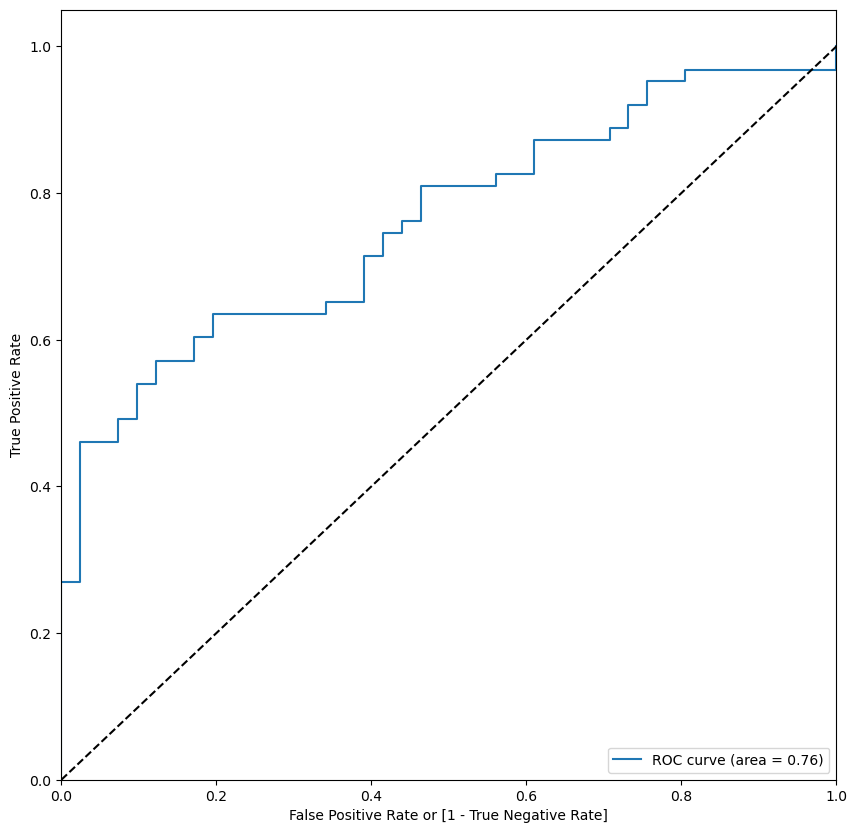

In [199]:
predictors = ['매출액_b1', '당기순이익_b1', '영업이익률_b1', '순이익률_b1', '부채비율_b1',
       '당좌비율_b1', '매출액_증분', '영업이익_증분', '영업이익률_증분', '순이익률_증분',
       '부채비율_증분', '당좌비율_증분']

X = X_train[predictors]

X_ = X_test[predictors]

model = sm.GLM(endog = Y_train, exog = sm.add_constant(X), family = sm.families.Binomial())

fit = model.fit()

print(fit.summary())
print('AIC : {0:.4f}'.format(fit.aic))

pred = (fit.predict(sm.add_constant(X)) > 0.5) * 1
print('train err rate : {}'.format(np.mean(Y_train != pred)))

print('-------------------test set-------------------')
model_diag(fit, X_)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  415
Model:                            GLM   Df Residuals:                      407
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -197.87
Date:                Tue, 06 Jun 2023   Deviance:                       395.73
Time:                        04:59:18   Pearson chi2:                     599.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.3296
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0567      0.570      5.360      0.0

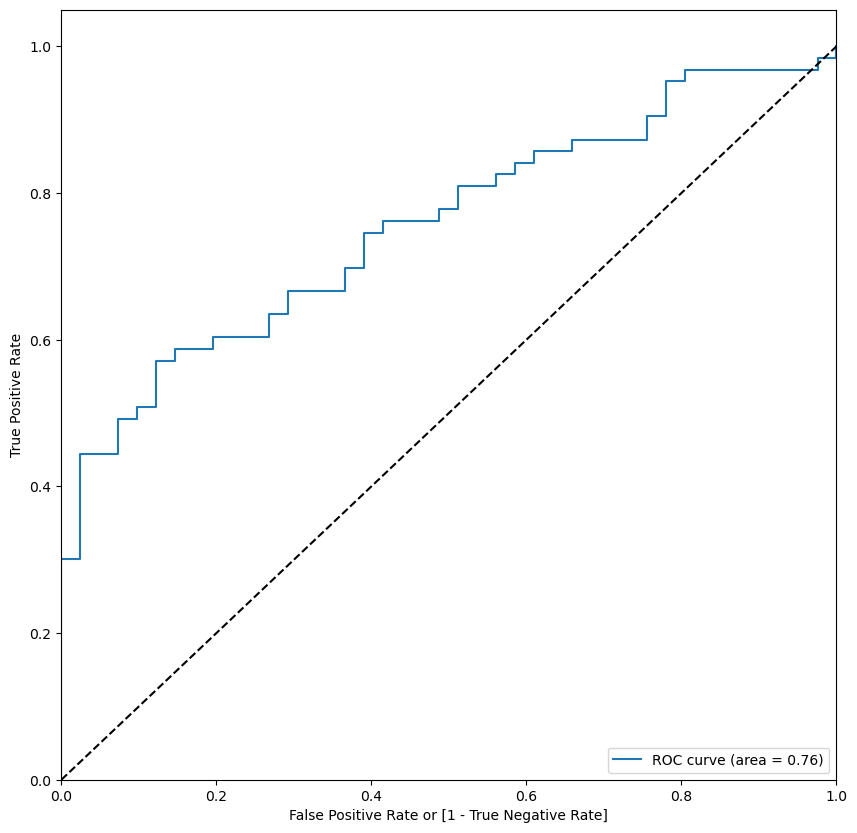

In [206]:
predictors = ['매출액_b1', '순이익률_b1', '부채비율_b1',
       '당좌비율_b1', '영업이익률_증분', '순이익률_증분', '당좌비율_증분']

X = X_train[predictors]

X_ = X_test[predictors]

model = sm.GLM(endog = Y_train, exog = sm.add_constant(X), family = sm.families.Binomial())

fit = model.fit()

print(fit.summary())
print('AIC : {0:.4f}'.format(fit.aic))

pred = (fit.predict(sm.add_constant(X)) > 0.5) * 1
print('train err rate : {}'.format(np.mean(Y_train != pred)))

print('-------------------test set-------------------')
model_diag(fit, X_)

# 최종 모델

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  415
Model:                            GLM   Df Residuals:                      407
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -197.87
Date:                Tue, 06 Jun 2023   Deviance:                       395.73
Time:                        05:02:28   Pearson chi2:                     599.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.3296
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0567      0.570      5.360      0.0

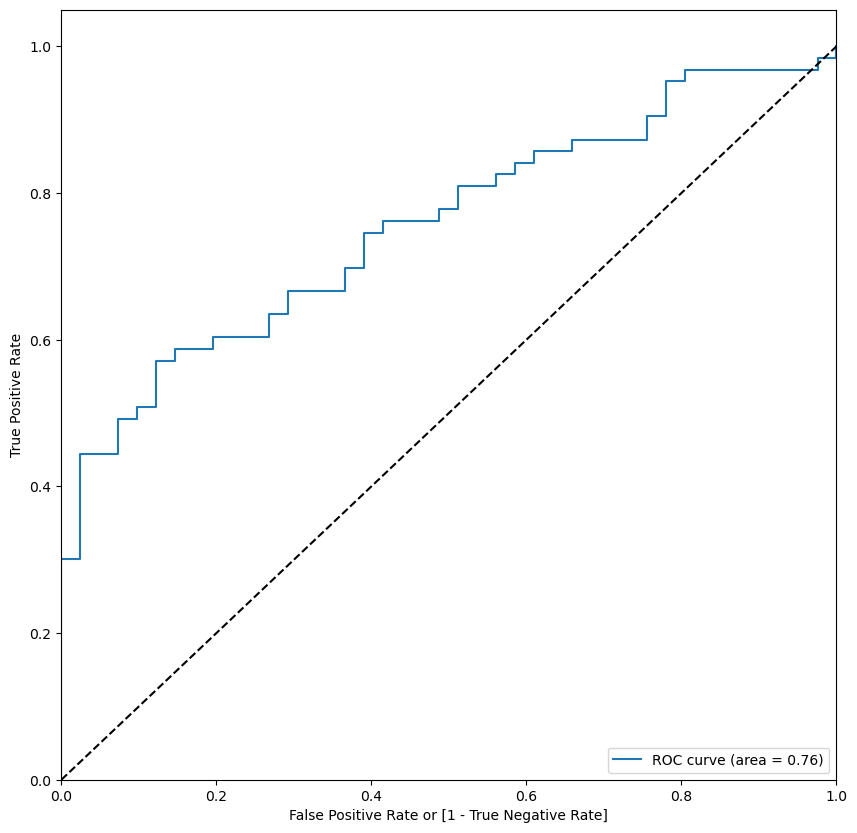

In [214]:
predictors = ['매출액_b1', '순이익률_b1', '부채비율_b1',
       '당좌비율_b1', '영업이익률_증분', '순이익률_증분', '당좌비율_증분']

X = X_train[predictors]

X_ = X_test[predictors]

model = sm.GLM(endog = Y_train, exog = sm.add_constant(X), family = sm.families.Binomial())

fit = model.fit()

print(fit.summary())
print('AIC : {0:.4f}'.format(fit.aic))

pred = (fit.predict(sm.add_constant(X)) > 0.5) * 1
print('train err rate : {}'.format(np.mean(Y_train != pred)))

print('-------------------test set-------------------')
model_diag(fit, X_)

In [217]:
predictors = ['매출액_b1', '순이익률_b1', '부채비율_b1', '당기순이익_b1',
       '당좌비율_b1', '당좌비율_증분']

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(X_train[predictors].values, i) for i in range(X_train[predictors].shape[1])]
vif["features"] = X_train[predictors].columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,1.454714,당좌비율_b1
1,1.362063,당좌비율_증분
2,1.258294,매출액_b1
3,1.252402,당기순이익_b1
4,1.093998,부채비율_b1
5,1.021281,순이익률_b1
